In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy.io import ascii
from astropy.table import Table

%matplotlib inline

# set some global options
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 18

lsun = 3.85e33

lc = ascii.read('WD_lightcurve_mags.dat')

thetalist = np.unique(lc['theta'])
philist = np.unique(lc['phi'])

lcc=lc[lc['time']!=24]
#lcc = lc

def Mabs(lum):
    return 4.77 - 2.5*np.log10(lum/lsun)

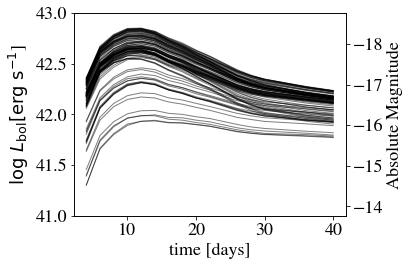

In [2]:
# Plot the Bolometric LC looping over angle
fig,ax1 = plt.subplots()
mycolor = plt.cm.jet
skip = 3  # EVERY Nth point in theta, phi
for i, theta in enumerate(thetalist[::skip]) :
    for j, phi in enumerate(philist[::skip]) :
        mask = ((lcc['theta']==theta) & (lcc['phi']==phi))
        ax1.plot(lcc['time'][mask],
                 np.log10(lcc['lbol'][mask]),
                 '-',
                 linewidth=1.0,
                 alpha=0.5,
                 #color=mycolor((thetaangle + 1.0)/2.0)
                 #color=mycolor(phi/6.28)
                 color='Black'
                 )

plt.ylim(41,43)
ax2 = ax1.twinx()
ax2.set_ylim(Mabs(1.e41),Mabs(1.e43))
ax1.set_ylabel(r"$\log  \ L_{\rm bol} [{\rm erg \ s}^{-1}$]")
ax2.set_ylabel("Absolute Magnitude")
ax1.set_xlabel("time [days]")
plt.tight_layout(pad=1)
#plt.savefig('lc_lbol.pdf')
plt.show()

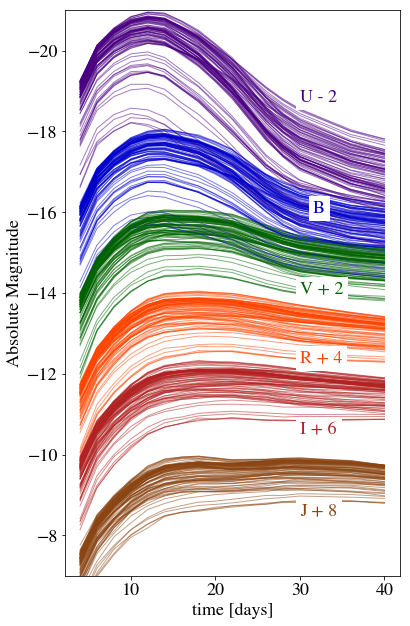

In [3]:
# Plot the color LCs looping over angle
plt.figure(figsize=(6,9))
mycolor = plt.cm.jet
dm = 2.
skip = 3  # EVERY Nth point in theta, phi
for i, theta in enumerate(thetalist[::skip]) :
    for j, phi in enumerate(philist[::skip]) :
        mask = ((lcc['theta']==theta) & (lcc['phi']==phi))
        plt.plot(lcc['time'][mask],
                 lcc['MU'][mask] - dm ,
                 '-',
                 linewidth=1.0,
                 alpha=0.5,
                 #color=mycolor((theta + 1.0)/2.0)
                 #color=mycolor(phi/6.28)
                 color='Indigo'
                 )

        plt.plot(lcc['time'][mask],
                 lcc['MB'][mask],
                 '-',
                 linewidth=1.0,
                 alpha=0.5,
                 #color=mycolor((theta + 1.0)/2.0)
                 #color=mycolor(phi/6.28)
                 color='MediumBlue'
                 )

        plt.plot(lcc['time'][mask],
                 lcc['MV'][mask] + dm,
                 '-',
                 linewidth=1.0,
                 alpha=0.5,
                 #color=mycolor((theta + 1.0)/2.0)
                 #color=mycolor(phi/6.28)
                 color='DarkGreen'
                 )
         
        plt.plot(lcc['time'][mask],
                 lcc['MR'][mask] +2*dm ,
                 '-',
                 linewidth=1.0,
                 alpha=0.5,
                 #color=mycolor((theta + 1.0)/2.0)
                 #color=mycolor(phi/6.28)
                 color='OrangeRed'
                 )

        plt.plot(lcc['time'][mask],
                 lcc['MI'][mask] +3*dm,
                 '-',
                 linewidth=1.0,
                 alpha=0.5,
                 #color=mycolor((theta + 1.0)/2.0)
                 #color=mycolor(phi/6.28)
                 color='FireBrick'
                 )
        
        plt.plot(lcc['time'][mask],
                 lcc['MJ'][mask] + 4*dm,
                 '-',
                 linewidth=1.0,
                 alpha=0.5,
                 #color=mycolor((theta + 1.0)/2.0)
                 #color=mycolor(phi/6.28)
                 color='SaddleBrown'
                 )

# Annotate
plt.annotate("U - 2",xy=(30,-18.75),color='Indigo',backgroundcolor='white')
plt.annotate("B",xy=(31.5,-16),color='MediumBlue',backgroundcolor='white')
plt.annotate("V + 2",xy=(30,-14),color='DarkGreen',backgroundcolor='white')
plt.annotate("R + 4",xy=(30,-12.3),color='OrangeRed',backgroundcolor='white')
plt.annotate("I + 6",xy=(30,-10.5),color='FireBrick',backgroundcolor='white')
plt.annotate("J + 8",xy=(30,-8.5),color='SaddleBrown',backgroundcolor='white')
 
plt.ylim(-7,-21)
plt.ylabel("Absolute Magnitude")
plt.xlabel(r"time [days]")
plt.tight_layout(pad=1)
#plt.savefig('lc_colors.pdf')
plt.show()